## Exploratory data analysis of the Irish weather


I will perform an exploratory data analysis (EDA) of historic weather data from Met Eireann, Ireland's main meteorological service. 

Dataset corresponds to entries from 2018 to 2019 in four different locations 


In [1]:
import numpy as np
import pandas as pd
import statistics as st 
from pandas import Series, DataFrame
import numpy.random as npr
import seaborn as sns
import matplotlib.pyplot as plt


### Understanding the different measurements and their details

In [10]:
# loading the data from csv file and skipping initial rows which describe measurements
data = pd.read_csv('weather_1819.csv', engine = 'python', sep = ',' , skiprows= 11)

# using unique function to obtain all values contained in 'year'
print(data['year'].unique())

# getting columns of dataframe: enables us to know which type of measurements have taken place
print(data.columns)


[2018 2019]
Index(['day', 'month', 'year', 'station', 'maxtp', 'mintp', 'rain', 'wdsp',
       'hg', 'sun'],
      dtype='object')


### There are 11 rows which serve as a dictionary, the data is a collection of constant tracking of weather measurements recorded in 4 different locations
### There is 2 years of recording [2018 2019] 
### The temporal resolution of the data is daily, as seen in code by checking the amount of entries and stations
### Importing the header shows us the dictionary and the weather measurements are day, month, and year of measurement, location of the measurement station, maximum and minimum air temperatures in Celsius, precipitation amount in millimeters, mean wind speed in knots, highest gust in knots, and sunshine duration in hours.


In [11]:
# printing no of missing values per column using .isna() and .sum() 
print(data.isna().sum())


day         0
month       0
year        0
station     0
maxtp      18
mintp      18
rain       23
wdsp        5
hg         16
sun         7
dtype: int64


### The amount of missing values by col obtained form above code. This is a really important to note since it can alter the presicion and objectiveness of a DataSet, depending on their characteristics
### These values might be missing for the following reasons: malfunction of sensors, human data manipulation error, loss of data, wrong retrieving of data, personal circumstances.
### Some of the strategies to solve these are the following:
### - usign dropna 
### - usign fillna using the mean/mode of the column


In [12]:
# finding values where the conditions are met  and assigning to variables
wind = data[max(data['hg']) == data['hg']]
temp =data[ max(data['maxtp']) == data['maxtp']]
rain = data[max(data['rain']) == data['rain']]

# using details() ot output the values in a string for the specific contitions 
def details(x):
    return x[['station','day', 'month', 'year']].values[0]

# outputing obtained answers
print("Highest wind gust recorded was in ", str(details(wind)))
print('Highest max air temperature recorded was in', str(details(temp)))
print('Highest amount of rain recorded was in', str(details(rain)))

Highest wind gust recorded was in  ['Knock Airport' 2 'jan' 2018]
Highest max air temperature recorded was in ['Shannon Airport' 28 'jun' 2018]
Highest amount of rain recorded was in ['Cork Airport' 15 'apr' 2019]


## Detailed numerical description of the different values


In [13]:
# printing the descriptions of the weather measurements, using round to improve clarity
print(round(data.describe(),2))

           day    year    maxtp    mintp     rain     wdsp       hg      sun
count  2920.00  2920.0  2902.00  2902.00  2897.00  2915.00  2904.00  2913.00
mean     15.72  2018.5    13.28     6.43     3.06     9.48    25.44     3.78
std       8.80     0.5     5.15     4.37     5.05     3.82     9.28     3.85
min       1.00  2018.0    -1.80    -7.00     0.00     2.30     7.00     0.00
25%       8.00  2018.0     9.50     3.10     0.00     6.50    19.00     0.30
50%      16.00  2018.5    12.80     6.40     0.70     8.90    24.00     2.60
75%      23.00  2019.0    17.10     9.60     4.00    11.80    30.00     6.30
max      31.00  2019.0    32.00    18.90    54.60    28.50    84.00    15.90


### Based on my observations we interpret the following relevant information 
 
 
#### day and year: we can verify that data is measure consistently (mean = 16~) and in the frame of 2018-19 years with no exceptions. We consequently understand the high value as std. dev since days fluctuate constantly: in reality the truth is that days are 

#### max and min temperature: they fluctuate in great manner and show an average mean range of (13.3 - 6.43) and their standard dev versus their mean (5.15,4.37) , however the absolute max and min temp as occurences are 32 and of -7 degrees, this gives us an idea of the climate in the different locations. Another interesting data is the temperature varation, table shows how max and min temperature do tend to have major swings.


#### rain:  is a very common occurence and its reflected in having a higher std in relation to its mean. Thus, there is a very big difference in the percentile range: 75% is 4 and max is 54, this is a result of frequent low rain and less variability when its strong rain, also can be observed through 50 pct since its 0.70 which reinforces again the panorama of frequent drizzle.


#### wind speed: the wind shows a mean of 9.48 and std of 3.42 and entries for different percentiles confirm that its faily distributed and has certain change in the speed... except for when its max where it has a higher jump from the 75th percentile where it becomes more notable (from 11.80 to 28.50)


#### highest gust: like with the wind speed there is a big jump from the 7 as minimum and max of 84, this being more than 4 times the average value (25.44), giving the certainty that wind and highest gust are both unpredictable and have a strong nature, giving the impression that there is many anticyclones.


#### sunshine duration: knowing that min is 0 and the duration doesnt have long durations (average 3.78) as well as a even higher std shows a modest appearance with irregularity: However, the data reflects the same by having a max of 15.9 which could also be explained with the long (more sunlight) days in Summer and short or non-existent in the winter days.

## The following code creates a graphical summary for each of the weather measurements

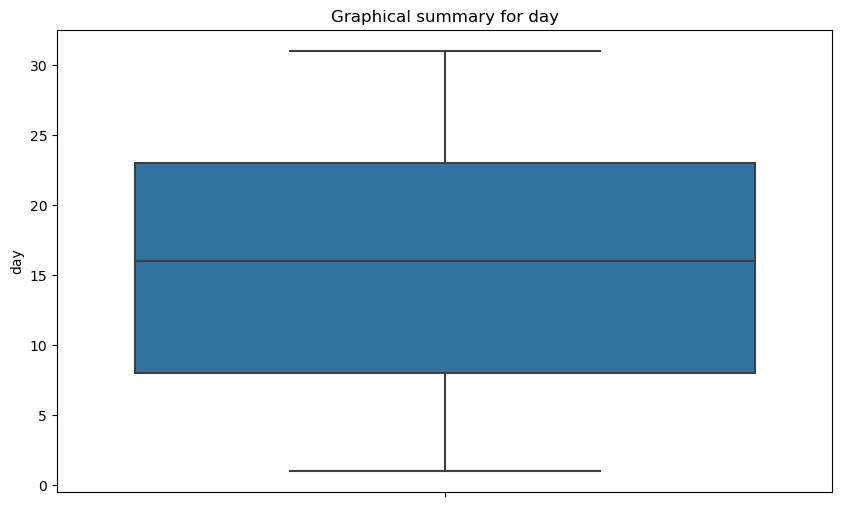

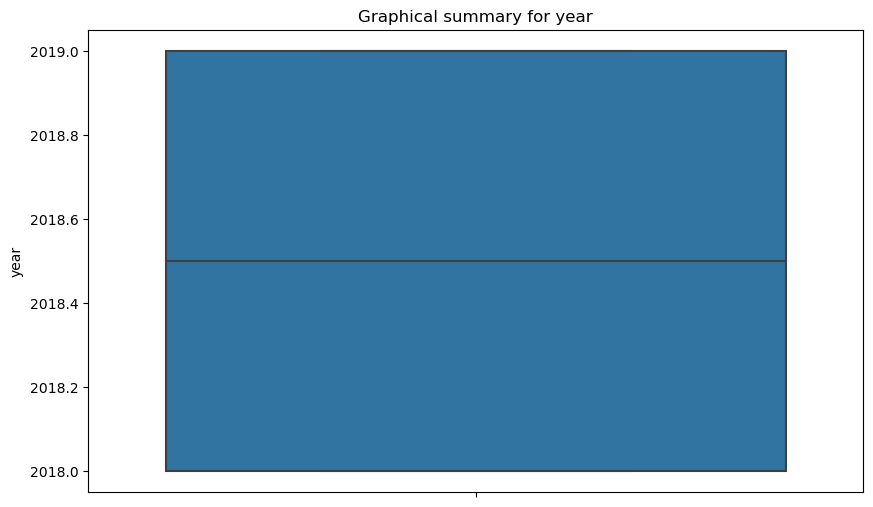

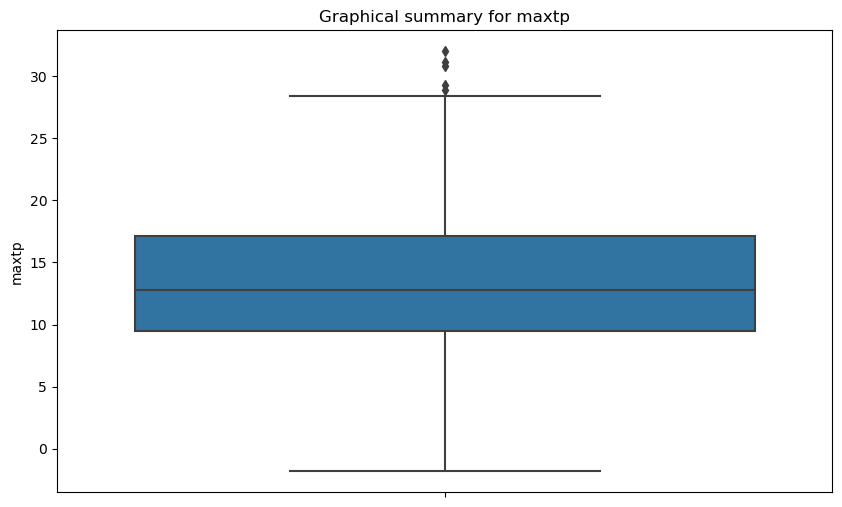

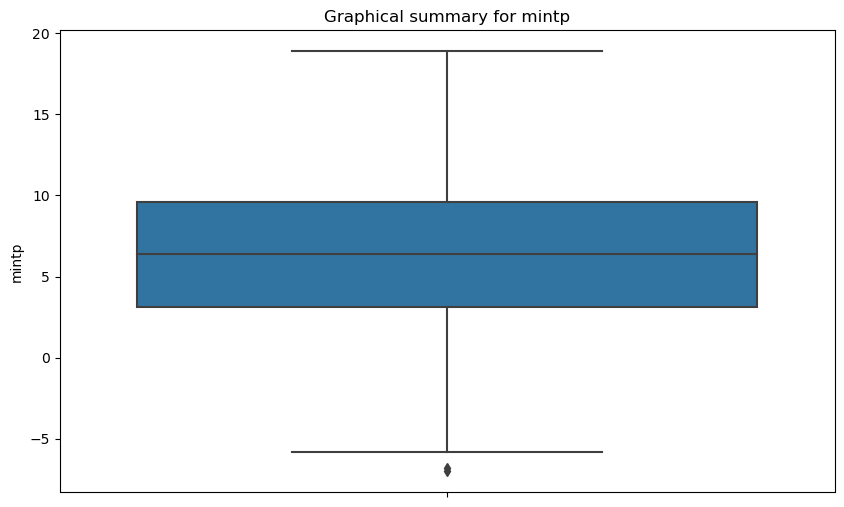

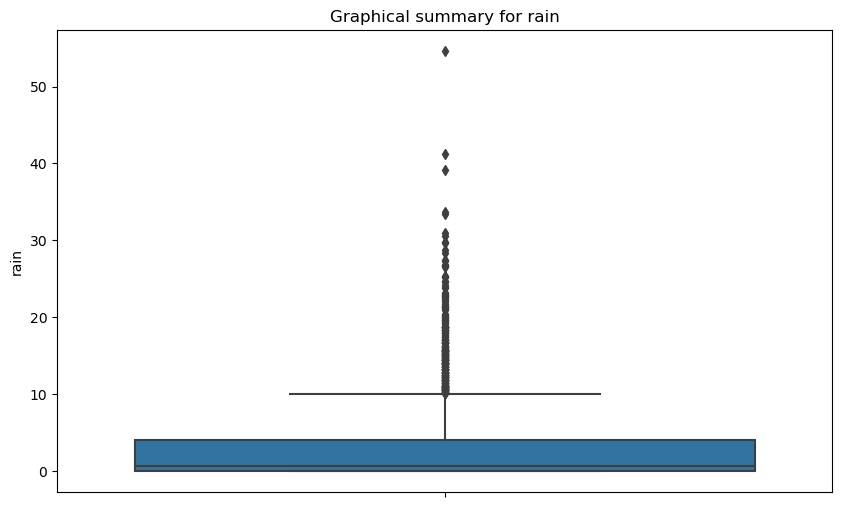

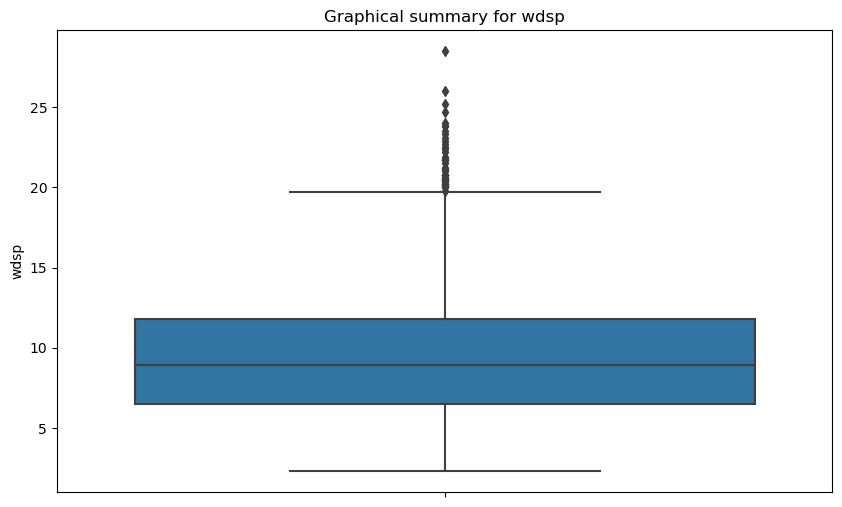

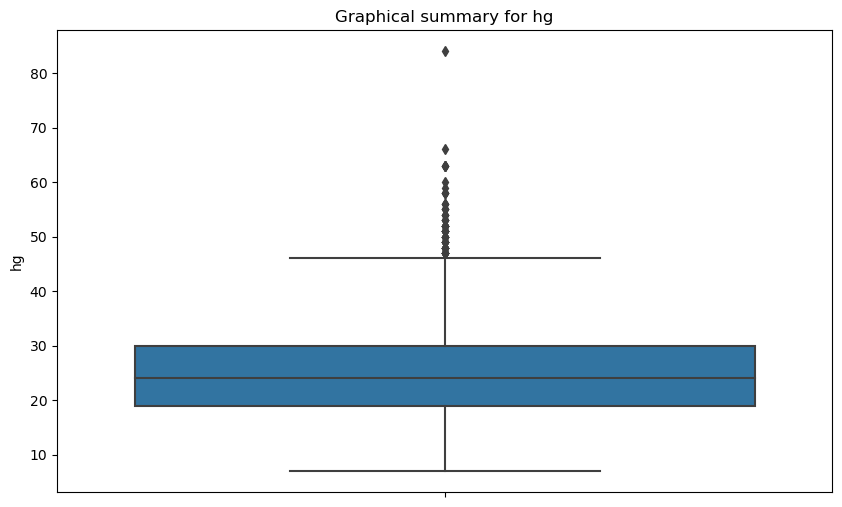

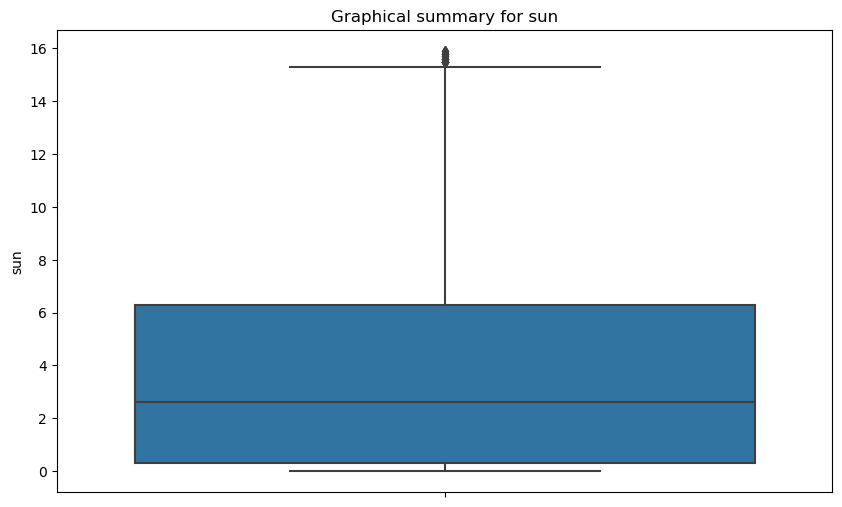

In [14]:
# function that returns the summaries for each col in data and formatting for output
def return_graphical_summaries(measurement):
    print()
    
    plt.figure(figsize=(10, 6))  
    plt.title(f'Graphical summary for {measurement}')
# to make more visually appealing

# using boxplots to emphatize on outliers since they correctly show how aggresive/volatile data can be 
    sns.boxplot(data=data, y=measurement)
    plt.show()

# getting columns to call function on columns
output = data.columns.tolist() 
for measurement in output:
    if measurement not in ['month', 'station']: #filtering values with string attribute, not relevant at the time of depicting data
        return_graphical_summaries(measurement)



#### After observing the different boxplots and usign the numerical data and interpretation, it is clear that the data depicts the characteristics mentioned previously. There is several outliers  that can clearly be seen in the form of rhombuses, this is observable in those graphs where the std indicates how dispersed is the data. These fluctuations are evident (specially for wind speed, wind gust and rain values), and show the different behaviours exhibited. Overall, the visual data reinforced the points made earlier and gives insight regarding the nature of the climate presented, aligning correctly to the numerical data interpretation given previously

<Figure size 3500x1500 with 0 Axes>

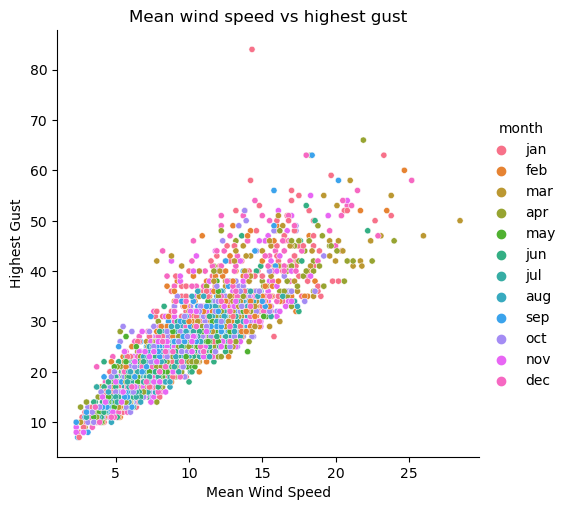

In [15]:
# outputing the scatterplot and assigning title, size of points decreased for clarity and size of plot adjusted
plt.figure(figsize=(35,15))
sns.relplot(data, x="wdsp", y="hg", hue='month', s=20)

# labelling
plt.xlabel("Mean Wind Speed")
plt.ylabel("Highest Gust")
plt.title("Mean wind speed vs highest gust")
plt.show()

### The plot is highly dense and its clear that there exists a directly proportional relationship between them. Its also evident that most of the data points lie between 10-60 (gusts) and around 5-20 (wind speed). When observing different months, we see how the highest wind gusts tend to occur between December and April, while in the data the most frequent data points between 5-15 wdsp months of September and after the speed of 15~ its Winter season Dec-Jan is the most fequent in higher wind speeds and its highest gusts. However, in April there is a tendency for higher gusts and weed speeds. This behaviour is product of the different seasons and it is also relevant to mention that the higher the values in both axis: the less concentrated the points become. 

In [16]:
# computing difference in range and add to a list 
difference = data.maxtp - data.mintp
data['t_range'] = list(difference)
# output last values
print(data.tail(10))

      day month  year        station  maxtp  mintp  rain  wdsp    hg  sun  \
2910   22   dec  2019  Knock Airport    7.0    2.7   4.8   8.0  20.0  3.1   
2911   23   dec  2019  Knock Airport    6.9    3.0   5.0  10.5  29.0  2.7   
2912   24   dec  2019  Knock Airport    6.6    3.1   0.7   8.4  24.0  2.9   
2913   25   dec  2019  Knock Airport    4.9    1.4   0.0   9.0  32.0  0.0   
2914   26   dec  2019  Knock Airport   10.0    4.8   6.2  12.2  34.0  0.0   
2915   27   dec  2019  Knock Airport   10.8    9.8   3.7  12.8  29.0  0.0   
2916   28   dec  2019  Knock Airport    9.8    7.9   0.0  14.8  30.0  0.0   
2917   29   dec  2019  Knock Airport   10.5    7.0   0.0  12.8  32.0  0.1   
2918   30   dec  2019  Knock Airport    9.6    3.4   NaN   8.4  21.0  0.0   
2919   31   dec  2019  Knock Airport    6.0    1.3   0.0   7.1  18.0  2.1   

      t_range  
2910      4.3  
2911      3.9  
2912      3.5  
2913      3.5  
2914      5.2  
2915      1.0  
2916      1.9  
2917      3.5  
2918    

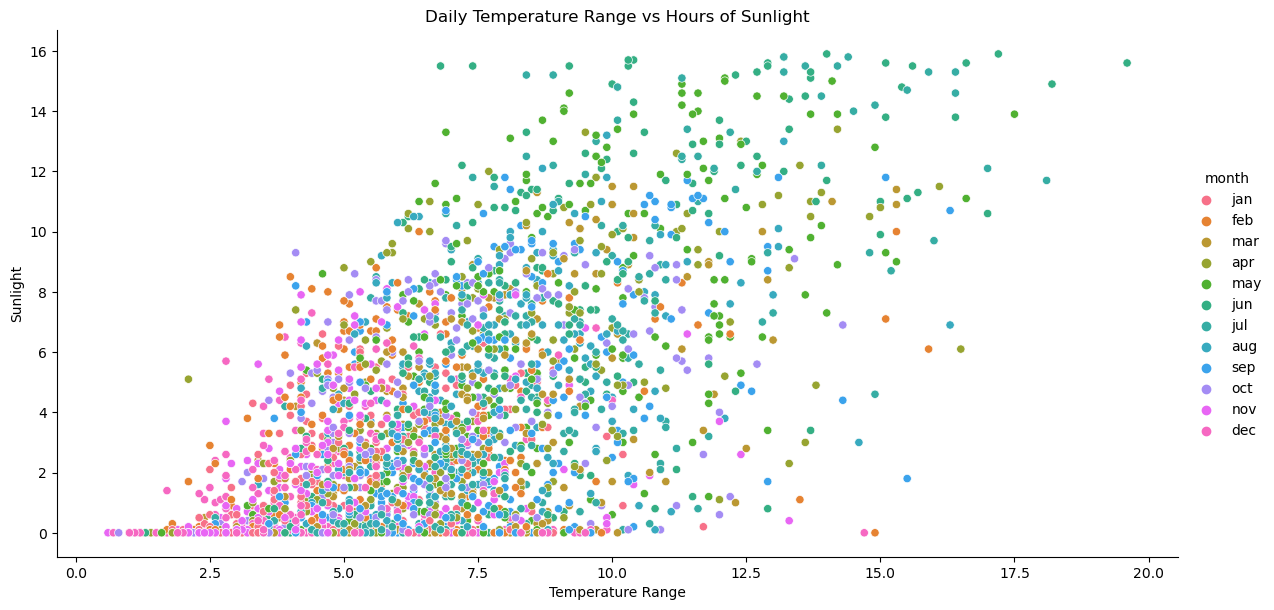

In [17]:
# plotting 
sns.relplot(data, x="t_range", y="sun", hue = 'month', height = 6, aspect = 2)
plt.title("Daily Temperature Range vs Hours of Sunlight")
plt.xlabel("Temperature Range")
plt.ylabel("Sunlight")
plt.show()

#### After plotting this relation between sunlight hours and t_range, we can observe how low values are more concentrated than those further past > 10 (t_range) and > 8 for (sunlight hours), resulting in different areas containing more spread out values. Overall, it is objective to say that when there is less sun, there is a tendency for the temperature range to be much lower. Thus, it is easily observable that points scatter throughout the graph in an inverse proportional manner: this meaning that as values increase for both axis, values tend to disperse by a greater degree. After checking for month tendency trends, we conclude each month has different areas where its ranging values tend to take up a smaller range of values. This is due to the different behaviours of climate, with clear tendency to decrease both parameters when it is a colder month as we can observe in the data representation, a clear example is the concentration of pink dots corresponding to Winter season (Nov, Dec, Jan). Similarly we observe the more spread values being those corresponding to values collected in Summer (June, July, August).

## Comparative analysis of the weather at Dublin Airport, Shannon Airport and Cork Airport.
## Interpretation and differences


Description for  Dublin Airport
         day    year  maxtp  mintp   rain   wdsp     hg    sun  t_range
count  730.0   730.0  730.0  730.0  726.0  728.0  728.0  729.0    730.0
mean    16.0  2018.0   14.0    6.0    2.0   10.0   25.0    4.0      8.0
std      9.0     1.0    5.0    4.0    4.0    4.0    8.0    4.0      3.0
min      1.0  2018.0   -0.0   -6.0    0.0    3.0    9.0    0.0      1.0
25%      8.0  2018.0   10.0    2.0    0.0    7.0   19.0    1.0      6.0
50%     16.0  2018.0   13.0    6.0    0.0    9.0   24.0    3.0      7.0
75%     23.0  2019.0   18.0    9.0    2.0   12.0   30.0    7.0     10.0
max     31.0  2019.0   27.0   18.0   24.0   28.0   56.0   16.0     18.0
******************************************************************************



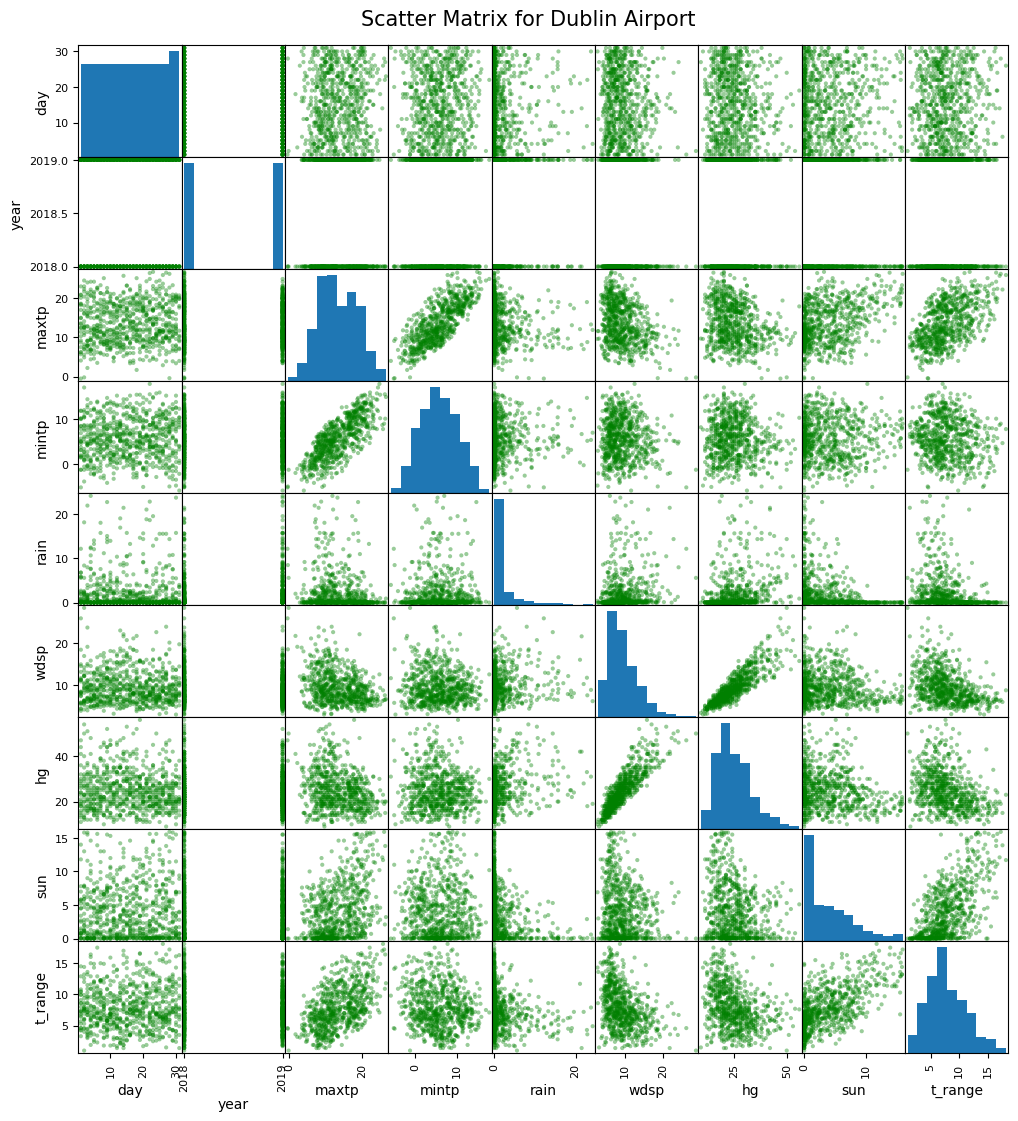


Description for  Shannon Airport
         day    year  maxtp  mintp   rain   wdsp     hg    sun  t_range
count  730.0   730.0  723.0  723.0  721.0  730.0  724.0  728.0    723.0
mean    16.0  2018.0   14.0    7.0    3.0    9.0   25.0    4.0      7.0
std      9.0     1.0    5.0    4.0    4.0    4.0   10.0    4.0      3.0
min      1.0  2018.0    0.0   -5.0    0.0    2.0    7.0    0.0      1.0
25%      8.0  2018.0   10.0    4.0    0.0    6.0   18.0    0.0      5.0
50%     16.0  2018.0   14.0    7.0    1.0    9.0   24.0    3.0      6.0
75%     23.0  2019.0   18.0   11.0    4.0   12.0   30.0    6.0      9.0
max     31.0  2019.0   32.0   19.0   33.0   25.0   66.0   16.0     20.0
******************************************************************************



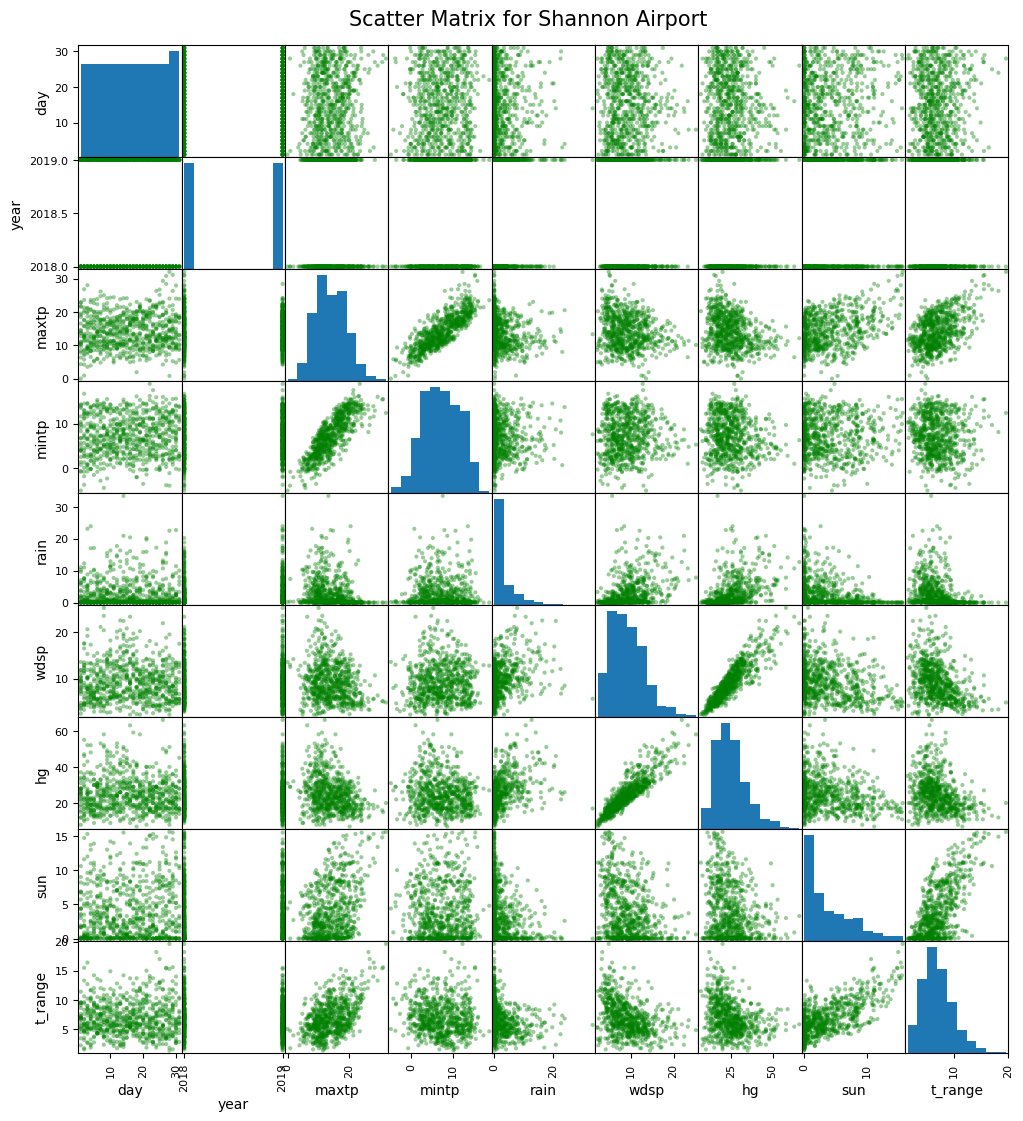


Description for  Cork Airport
         day    year  maxtp  mintp   rain   wdsp     hg    sun  t_range
count  730.0   730.0  723.0  723.0  723.0  728.0  726.0  727.0    723.0
mean    16.0  2018.0   13.0    7.0    3.0   10.0   26.0    4.0      6.0
std      9.0     1.0    5.0    4.0    6.0    4.0    9.0    4.0      2.0
min      1.0  2018.0   -2.0   -7.0    0.0    3.0   10.0    0.0      1.0
25%      8.0  2018.0   10.0    4.0    0.0    7.0   19.0    0.0      5.0
50%     16.0  2018.0   12.0    7.0    1.0    9.0   24.0    3.0      6.0
75%     23.0  2019.0   17.0   10.0    4.0   12.0   32.0    7.0      8.0
max     31.0  2019.0   27.0   16.0   55.0   24.0   63.0   16.0     14.0
******************************************************************************



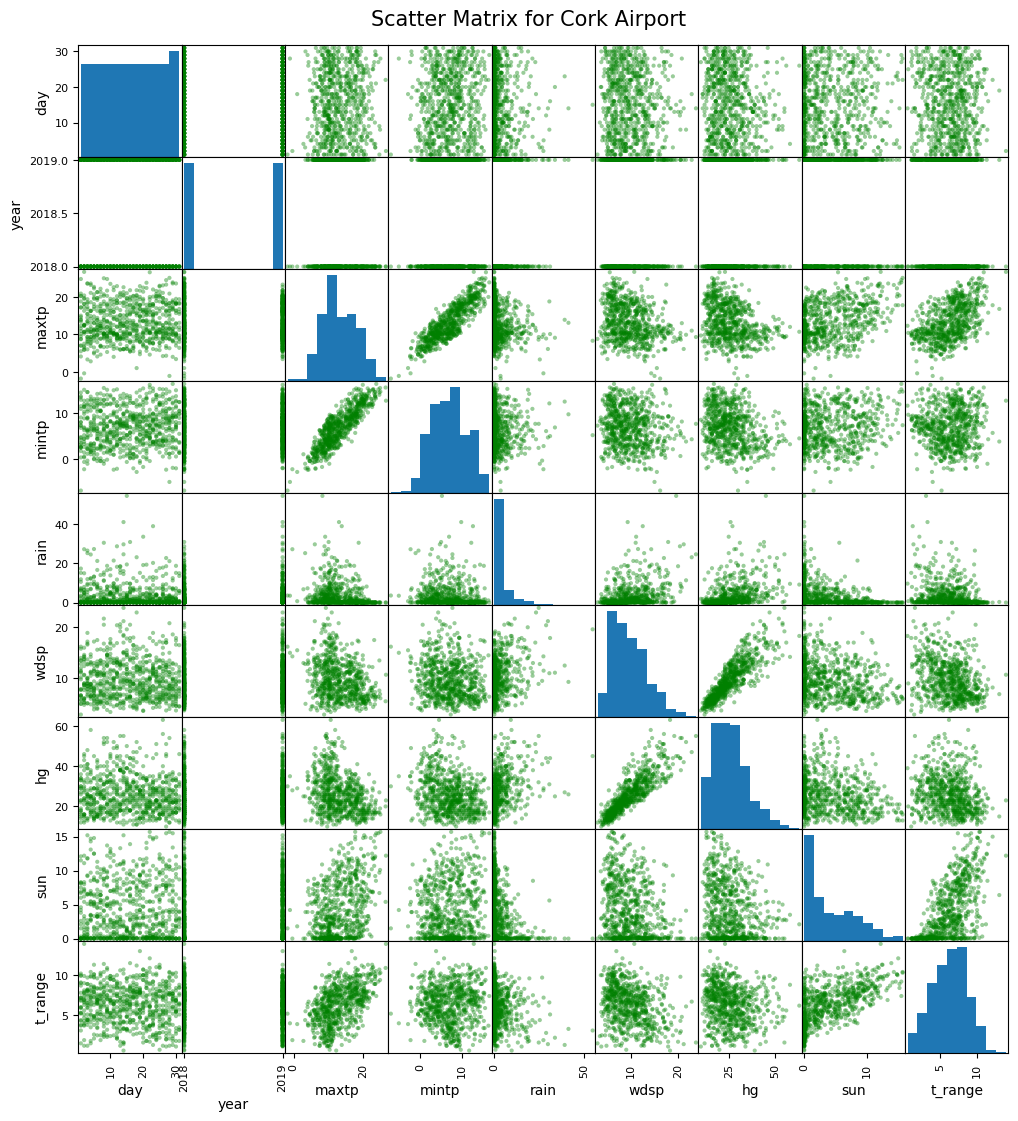

8

In [18]:
data_new  = data[data.station != 'Knock Airport'] # except Knock airpor: does not apply
stations = data_new.station.unique().tolist()

def return_numerical(name):
    print()
    print('Description for ', name)
    output = data[data['station'] == name].describe()
# rounding to improve output
    print(round(output))
    print('*' * 78)

def return_graphical(name):
    print()
# plotting a scatter where output is the one desireed and inputed in the function 
    pd.plotting.scatter_matrix(data[data['station'] == name],diagonal='hist',color='g', alpha = 0.4, figsize=(12,12));
    plt.subplots_adjust(top=0.95)
# adjusting label
    plt.suptitle('Scatter Matrix for ' + name, fontsize=15)
    plt.show()

# calling funtion for each of the stations except Knock airport
for station in stations:
    return_numerical(station)
    return_graphical(station)
8


#### When comparing the different numerical values recorded we can observe; Overall, the locations show a similar behaviour and behave similarly. However, there are some indicators that suggest the each microclimate are distinct and have their own properties and behave accordingly. Firstly, when referencing temperature, all three airports have similar minimum and maximum values, except Shannon airport where there is an increase of 5 degrees of maximum temp (32). Secondly, it is also worth mentioning rainfall, in Cork there is a maximum rain of 55mm which is a great degree higher than the other Dublin and Shannon airport; 24mm and 33mm respectively. Nevertheless, they all have similar mean values for rain (2-3 mm/day). When referencing windspeed, Dublin airport measures higher extreme values then the other two airports, while the highest wind wind gusts are much severly higher in these two (and they still have the same averages 25-26 knots). We also notice how they all have same values for sunlight hours, showing little to no difference, and the same event occurs witht he temp max range, except when we talk about maximun values recorded where Shannon airport has shown a max range of 20 degrees between highest and lowest temperature. When interpreting the different graphical and numerical data, we observe that Shannon Airport has a higher susceptibility of more extreme weather conditions, this could be caused by different geographical characteristics and conditions. Similarly Cork Airports weather shows more rainy tendency. In conclusion, the numerical and graphical data suggest there exists a pattern which has different differentiating data without changing its standard trend overall. It is also worth noticing that numerical values give more differentiating values for measurements, since they give the exact values while the graphs have more standarized values as an overview.